# Artificial Neural Network

### Importing the libraries

In [255]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [256]:
import seaborn as sn

In [257]:
import matplotlib.pyplot as plt

In [258]:
# # too see max columns
# pd.set_option('display.max_columns',None)

In [259]:
tf.__version__

'2.10.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [260]:
df= pd.read_csv(r'https://raw.githubusercontent.com/gnaneshwari1802/NareshDataScienceTasksAndProjects/main/21.%20Artificial%20Neural%20Networks/Churn_Modelling.csv')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [262]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [263]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [264]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [265]:
# we didn't require customerID so we drop it
df = df.drop('CustomerId',axis=1)
# we didn't require customerID so we drop it
df = df.drop('Surname',axis=1)
# we didn't require customerID so we drop it
df = df.drop('RowNumber',axis=1)

In [266]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [267]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [268]:
c=len(df.columns)

In [269]:
c

11

In [270]:
#numerical variables

num = list(df.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(df.select_dtypes(include='O').keys())

print(cat)

print(num)

['Geography', 'Gender']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [271]:
# value_counts of the categorical columns
for i in cat:
    print(df[i].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [272]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [273]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [274]:
dataset=df

In [275]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming you have already fitted the LabelEncoder to your 'Geography' column
# label_encoder_geography = LabelEncoder()
# # Assuming 'geography_column' is your 'Geography' column
# label_encoder_geography.fit(geography_column)

# # Get the classes
# label_encoder_geography_classes = label_encoder_geography.classes_

# print("Encoded classes for Geography:", label_encoder_geography_classes)


In [276]:
from sklearn.preprocessing import LabelEncoder
label_encoder_geography = LabelEncoder()
dataset['Geography']=label_encoder_geography.fit_transform(dataset['Geography'])

# Get the classes
label_encoder_geography_classes = label_encoder_geography.classes_

print("Encoded classes for Geography:", label_encoder_geography_classes)

label_encoder_gender = LabelEncoder()
dataset['Gender']=label_encoder_gender.fit_transform(dataset['Gender'])
# df['PaymentMethod'] = label.fit_transform(df['PaymentMethod'])

# Get the classes
label_encoder_gender_classes = label_encoder_gender.classes_

print("Encoded classes for Gender:", label_encoder_gender_classes)

Encoded classes for Geography: ['France' 'Germany' 'Spain']
Encoded classes for Gender: ['Female' 'Male']


In [277]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [278]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [279]:

# X = dataset.iloc[:, 3:-1].values
# y = dataset.iloc[:, -1].values

In [280]:
dataset.columns,len(dataset.columns)

(Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
        'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
        'Exited'],
       dtype='object'),
 11)

In [281]:
# scale_cols =[ 'RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
#        'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
#        'EstimatedSalary', 'Exited']
# # now we scling all the data 
# from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler()
# dataset[scale_cols] = scale.fit_transform(dataset[scale_cols])

In [282]:
# independent and dependent variables
x = dataset.drop(labels=['Exited'],axis=1)
y = dataset['Exited']

In [283]:

# #Create dummy variables
# geography=pd.get_dummies(X["Geography"],drop_first=True)
# gender=pd.get_dummies(X['Gender'],drop_first=True)

# ## Concatenate the Data Frames

# X=pd.concat([X,geography,gender],axis=1)

# ## Drop Unnecessary columns
# X=X.drop(['Geography','Gender'],axis=1)

In [284]:
print(x), len(x)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


(None, 10000)

In [285]:
print(y), len(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


(None, 10000)

### Encoding categorical data

Label Encoding the "Gender" column

In [289]:
# print(X)

One Hot Encoding the "Geography" column

In [290]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [291]:
# print(X)

### Feature Scaling

In [292]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(x)

In [293]:
print(x)

[[-0.32622142 -0.90188624 -1.09598752 ...  0.64609167  0.97024255
   0.02188649]
 [-0.44003595  1.51506738 -1.09598752 ... -1.54776799  0.97024255
   0.21653375]
 [-1.53679418 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.60498839 -0.90188624 -1.09598752 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.25683526  0.30659057  0.91241915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.46377078 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
  -1.07636976]]


### Splitting the dataset into the Training set and Test set

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [295]:
X_train, X_test, y_train, y_test 

(array([[ 0.17042381,  1.51506738, -1.09598752, ...,  0.64609167,
         -1.03067011,  1.10838187],
        [-2.31280236,  0.30659057,  0.91241915, ...,  0.64609167,
          0.97024255, -0.74759209],
        [-1.19535058, -0.90188624, -1.09598752, ...,  0.64609167,
         -1.03067011,  1.48746417],
        ...,
        [ 0.90504489, -0.90188624,  0.91241915, ...,  0.64609167,
         -1.03067011,  1.41441489],
        [-0.62627792,  1.51506738, -1.09598752, ...,  0.64609167,
          0.97024255,  0.84614739],
        [-0.28483432,  0.30659057, -1.09598752, ...,  0.64609167,
         -1.03067011,  0.32630495]]),
 array([[-0.55385049,  0.30659057, -1.09598752, ...,  0.64609167,
          0.97024255,  1.61304597],
        [-1.31951189, -0.90188624, -1.09598752, ...,  0.64609167,
         -1.03067011,  0.49753166],
        [ 0.57394806,  1.51506738, -1.09598752, ...,  0.64609167,
          0.97024255, -0.4235611 ],
        ...,
        [-0.75043923,  1.51506738,  0.91241915, ...,  

In [296]:
print("Training samples:" , X_train.shape[0])
print("Testing samples:" ,X_test.shape[0])
print("Training sample size:",X_train.shape)
print("Testing sample size:",X_test.shape)

Training samples: 8000
Testing samples: 2000
Training sample size: (8000, 10)
Testing sample size: (2000, 10)


In [297]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)# Scaling fitted only to training set to avoid information leakage.
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [309]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [310]:
from sklearn.preprocessing import OrdinalEncoder

In [311]:
# # prepare input data
# def prepare_inputs(X_train, X_test):
# 	oe = OrdinalEncoder()
# 	oe.fit(X_train)
# 	X_train_enc = oe.transform(X_train)
# 	X_test_enc = oe.transform(X_test)
# 	return X_train_enc, X_test_enc

In [312]:
# # prepare target
# def prepare_targets(y_train, y_test):
#  le = LabelEncoder()
#  le.fit(y_train)
#  y_train_enc = le.transform(y_train)
#  y_test_enc = le.transform(y_test)
#  return y_train_enc, y_test_enc

In [313]:
# # prepare input data
# X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# # prepare output data
# y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [314]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [315]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [316]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [317]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# classifier.add(Dense(units=1,activation='relu'))


In [318]:
# # Adding the input layer and the first hidden layer

# classifier.add(Dense(output_dim = 11, init = 'he_uniform',activation='relu',input_dim = 11))
# # 1st HL i will consider for 6 neurons, init - initiliazaton parameter, weights need to be initialise, 
# #classifier.add(Dense(units = 10, kernel_initializer = 'he_normal',activation='relu',input_dim = 11))
# #classifier.add(Dropout(0.3))

# # Adding the second hidden layer
# #classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# classifier.add(Dense(units = 11, kernel_initializer = 'he_normal',activation='relu'))
# #classifier.add(Dropout(0.4))

# # Adding the third hidden layer

# classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))
# #classifier.add(Dropout(0.2))

# # Adding the output layer
# #classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))
# classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


# # Compiling the ANN
# classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# # Fitting the ANN to the Training set
# model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 10)
# # reason why i take validation_split because test my data separately



## Training the ANN

### Compiling the ANN

In [319]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [320]:
# model_history=ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
# model_history = ann.fit(y_train, y_test, batch_size=32, epochs=100, validation_data=(X, y))
model_history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6478 - accuracy: 0.6421 - val_loss: 0.5215 - val_accuracy: 0.8010
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4960 - accuracy: 0.7968 - val_loss: 0.4750 - val_accuracy: 0.7965
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4638 - accuracy: 0.7994 - val_loss: 0.4536 - val_accuracy: 0.8025
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4457 - accuracy: 0.8019 - val_loss: 0.4404 - val_accuracy: 0.8045
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4339 - accuracy: 0.8066 - val_loss: 0.4303 - val_accuracy: 0.8110
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4260 - accuracy: 0.8116 - val_loss: 0.4232 - val_accuracy: 0.8125
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4208 - accuracy: 0.8130 - val_loss: 0.4172 - val_accuracy: 0.8180

In [321]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


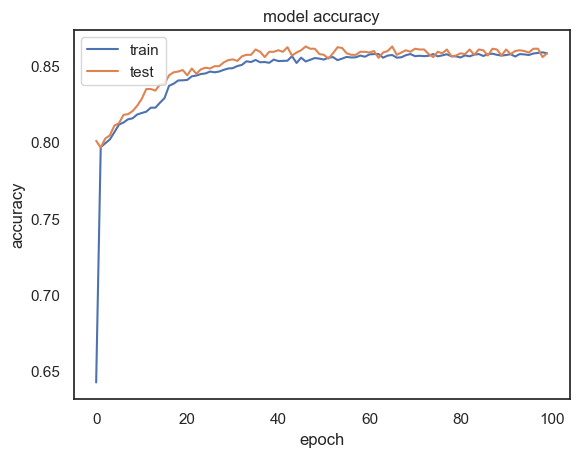

In [322]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

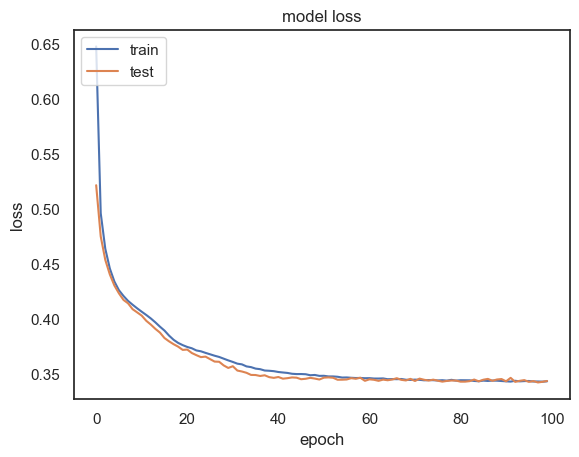

In [323]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

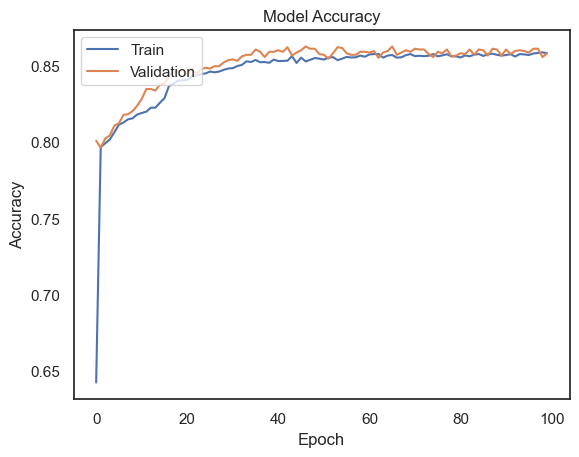

In [324]:
# summarize history for accuracy
if 'accuracy' in model_history.history:
    train_acc = model_history.history['accuracy']
    val_acc = model_history.history['val_accuracy']
elif 'acc' in model_history.history:
    train_acc = model_history.history['acc']
    val_acc = model_history.history['val_acc']

# Plot accuracy
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# This code will check for both 'accuracy' and 'acc' keys in model_history and plot the appropriate accuracy based on which key is found.

# Make sure to use the correct key depending on your specific TensorFlow/Keras version.




# Was this response better or worse?

# Better

# Worse

# Same




## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [325]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


### Making the Confusion Matrix

In [326]:
# score

In [327]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Predicting the Test set results
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


63/63 [==============================] - 0s 2ms/step
Accuracy: 0.8585
Precision: 0.75
Recall: 0.45185185185185184
F1 Score: 0.5639445300462249
Confusion Matrix:
[[1534   61]
 [ 222  183]]
ROC AUC Score: 0.7068036688726343


Text(179.75, 0.5, 'True_number')

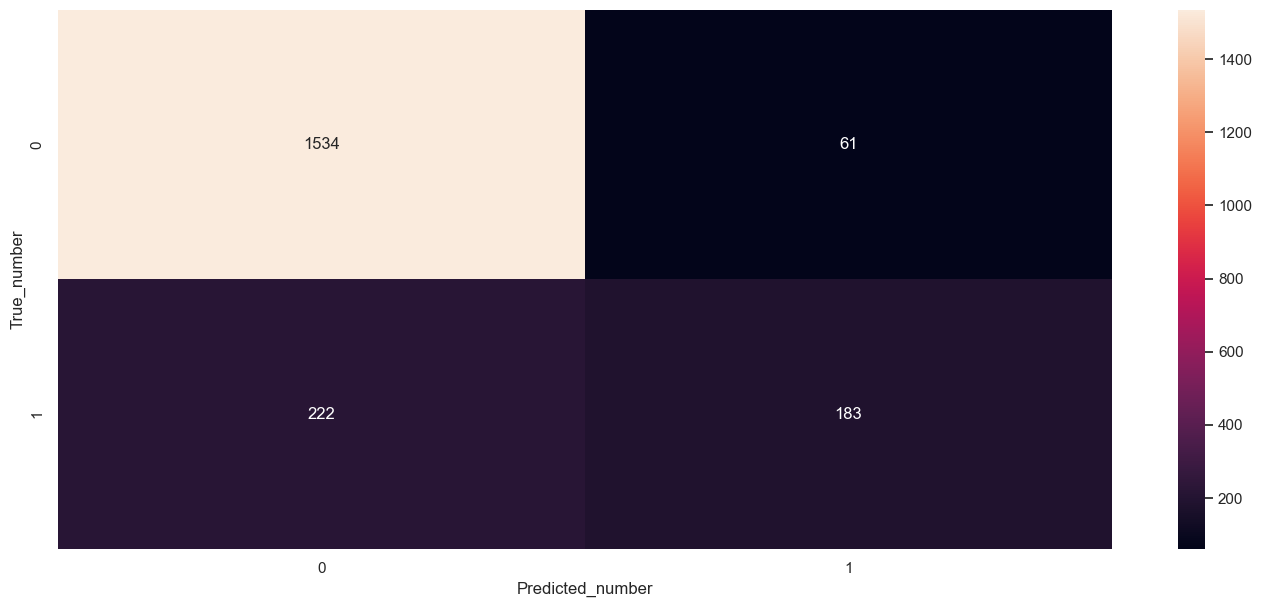

In [328]:
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (17,7))
sn.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number')

In [329]:
ann.save("D:/artificial_neural_network Churn_Modelling.h5")

In [330]:
from keras.models import load_model 
model = load_model("D:/artificial_neural_network Churn_Modelling.h5") 
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Train loss:', train_loss)
print('Train accuracy:', train_accuracy)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


63/63 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8585
Train loss: 0.34144532680511475
Train accuracy: 0.8585000038146973
Test loss: 0.3434601128101349
Test accuracy: 0.8585000038146973


In [331]:
geography = input("Enter Geography (e.g., France, Spain, Germany): ")
geography_encoded = label_encoder_geography.transform([geography])

Enter Geography (e.g., France, Spain, Germany):  Germany


In [333]:
geography_encoded

array([1])

63/63 [==============================] - 0s 3ms/step


Text(92.25, 0.5, 'Expected')

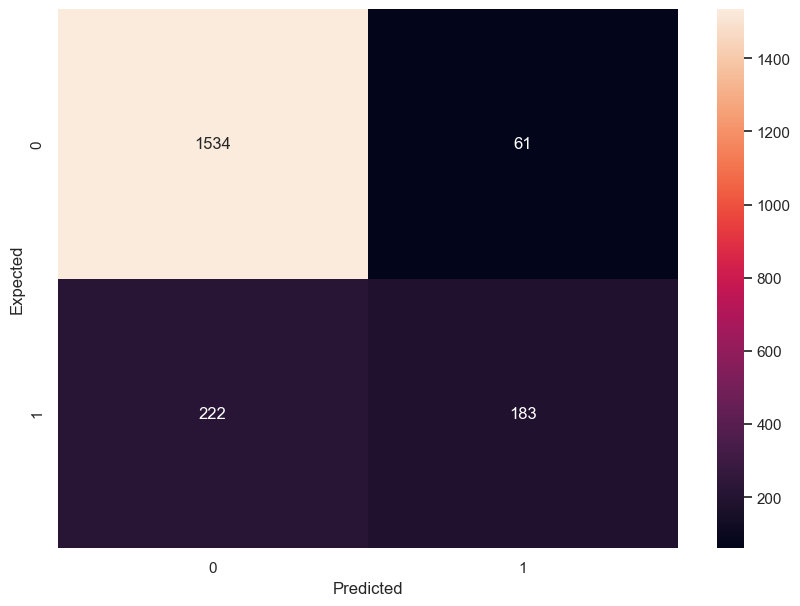

In [334]:
y_predicted = model.predict(X_test)
y_predicted_labels = y_predicted > 0.5
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Expected')

**PERFORMANCE METRICS**

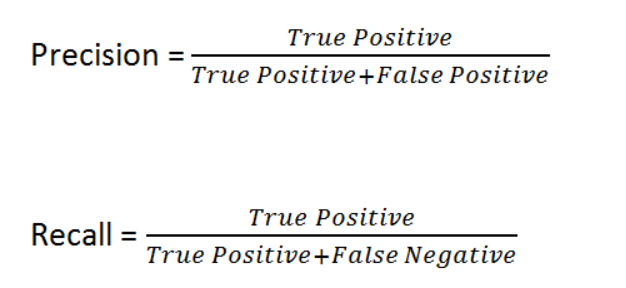


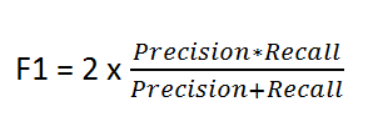


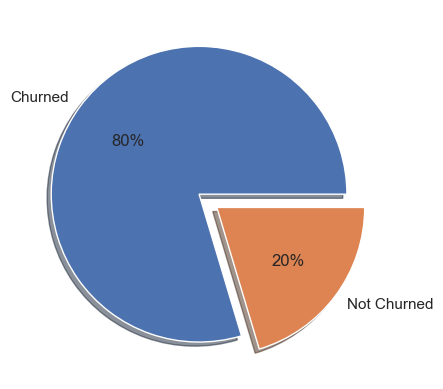

In [335]:
import matplotlib.pyplot as plt

output = dataset['Exited'].value_counts() #counting the number of entries for values of Exited i.e 0,1
out_labels = ['Churned','Not Churned']
out_explode = [0,0.15]

plt.pie(output, labels=out_labels, explode=out_explode, autopct='%1.0f%%',shadow=True)
plt.show()

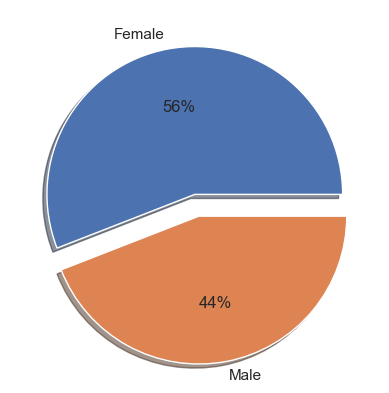

Gender
0    1139
1     898
Name: count, dtype: int64

In [336]:
df_cond = dataset['Exited'].values==1
df_churned = dataset[df_cond]          #dataset containing only churned entries
gen_count = df_churned['Gender'].value_counts()   #counting the number of entries for each gender in churned dataset
gen_labels = ['Female','Male']
gen_explode = [0,0.15]

plt.pie(gen_count, labels=gen_labels, explode=gen_explode, autopct='%1.0f%%',shadow=True)
plt.show()
gen_count

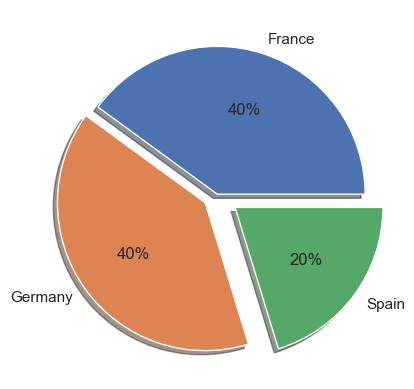

Geography
1    814
0    810
2    413
Name: count, dtype: int64

In [337]:
geo_count = df_churned['Geography'].value_counts() #counting the number of entries for each country in chuned dataset
geo_labels = ['France','Germany','Spain']
geo_explode = [0,0.1,0.15]

plt.pie(geo_count,labels = geo_labels,explode = geo_explode, autopct = '%1.0f%%',shadow = True)
plt.show()
geo_count

<Axes: xlabel='NumOfProducts'>

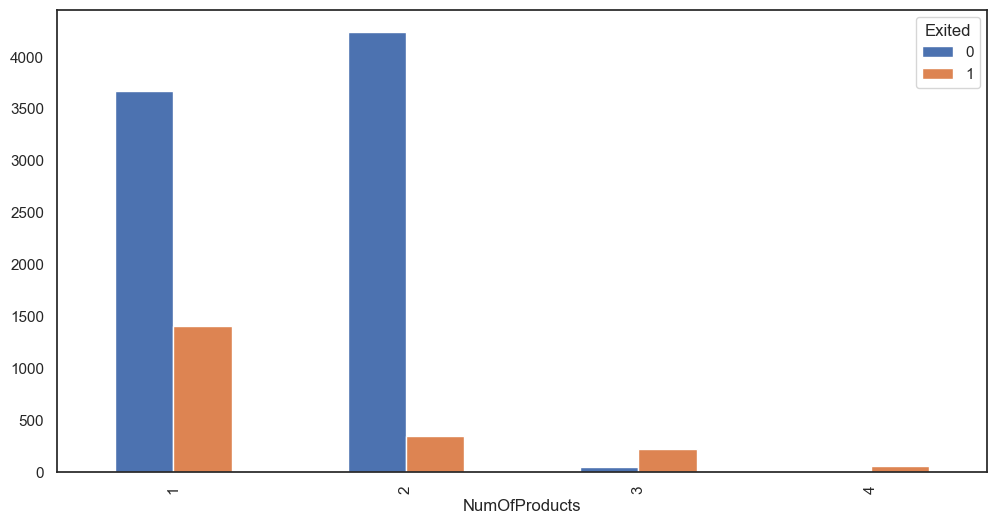

In [338]:
dataset.groupby('Exited')['NumOfProducts'].value_counts().unstack('Exited').plot.bar(figsize=(12,6))

In [339]:
df_cond = dataset['Exited'].values==0
df_notchurned = dataset[df_cond]

df_notchurned['NumOfProducts'].value_counts() #count for each value of NumOfProducts of non-churned customer

NumOfProducts
2    4242
1    3675
3      46
Name: count, dtype: int64

In [340]:
df_churned['NumOfProducts'].value_counts()  #count for each value of NumOfProducts of churned customer

NumOfProducts
1    1409
2     348
3     220
4      60
Name: count, dtype: int64

**Analysing the impact of CreditScore, IsActiveMember, HasCrCard and Tenure attributes against the target attribute(Exited) through Bar plots**



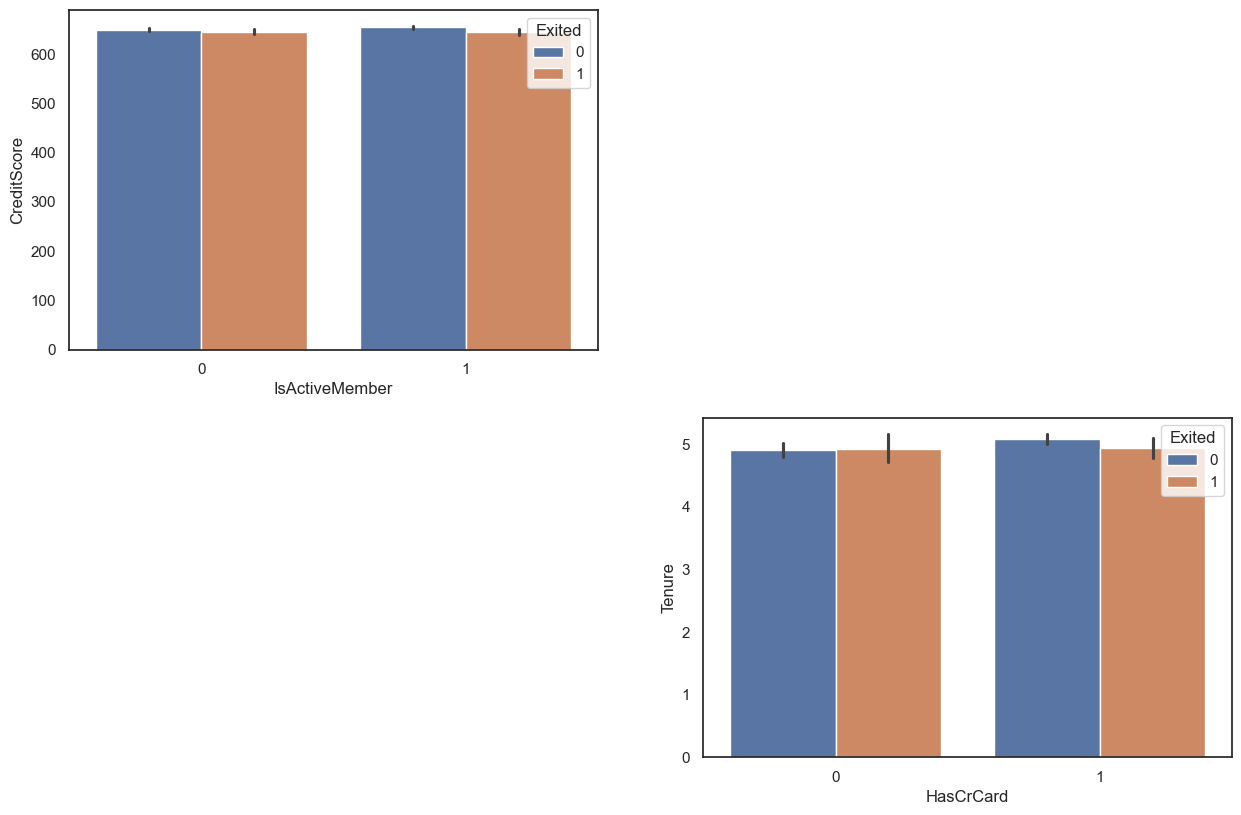

In [341]:
# Analaysing the effect of being an active member and having credit card and whether or not they have exited.

plt.figure(figsize = (15,15))

# Plots the bar chart for IsActiveMember(x-axis) with CreditScore(y-axis) and categorises IsActiveMember further as people who Exited vs Not Exited.
plt.subplot(3,2,1)
_= sn.barplot(x='IsActiveMember',y = 'CreditScore', hue = 'Exited',data = dataset)

# Plots the bar chart for HasCrCard(x-axis) with Tenure(y-axis) and categorises HasCrCard further as people who Exited vs Not Exited.
plt.subplot(3,2,4)
_= sn.barplot(x='HasCrCard',y = 'Tenure',hue = 'Exited',data = dataset)

Minimum Age : 18
Maximum Age : 92


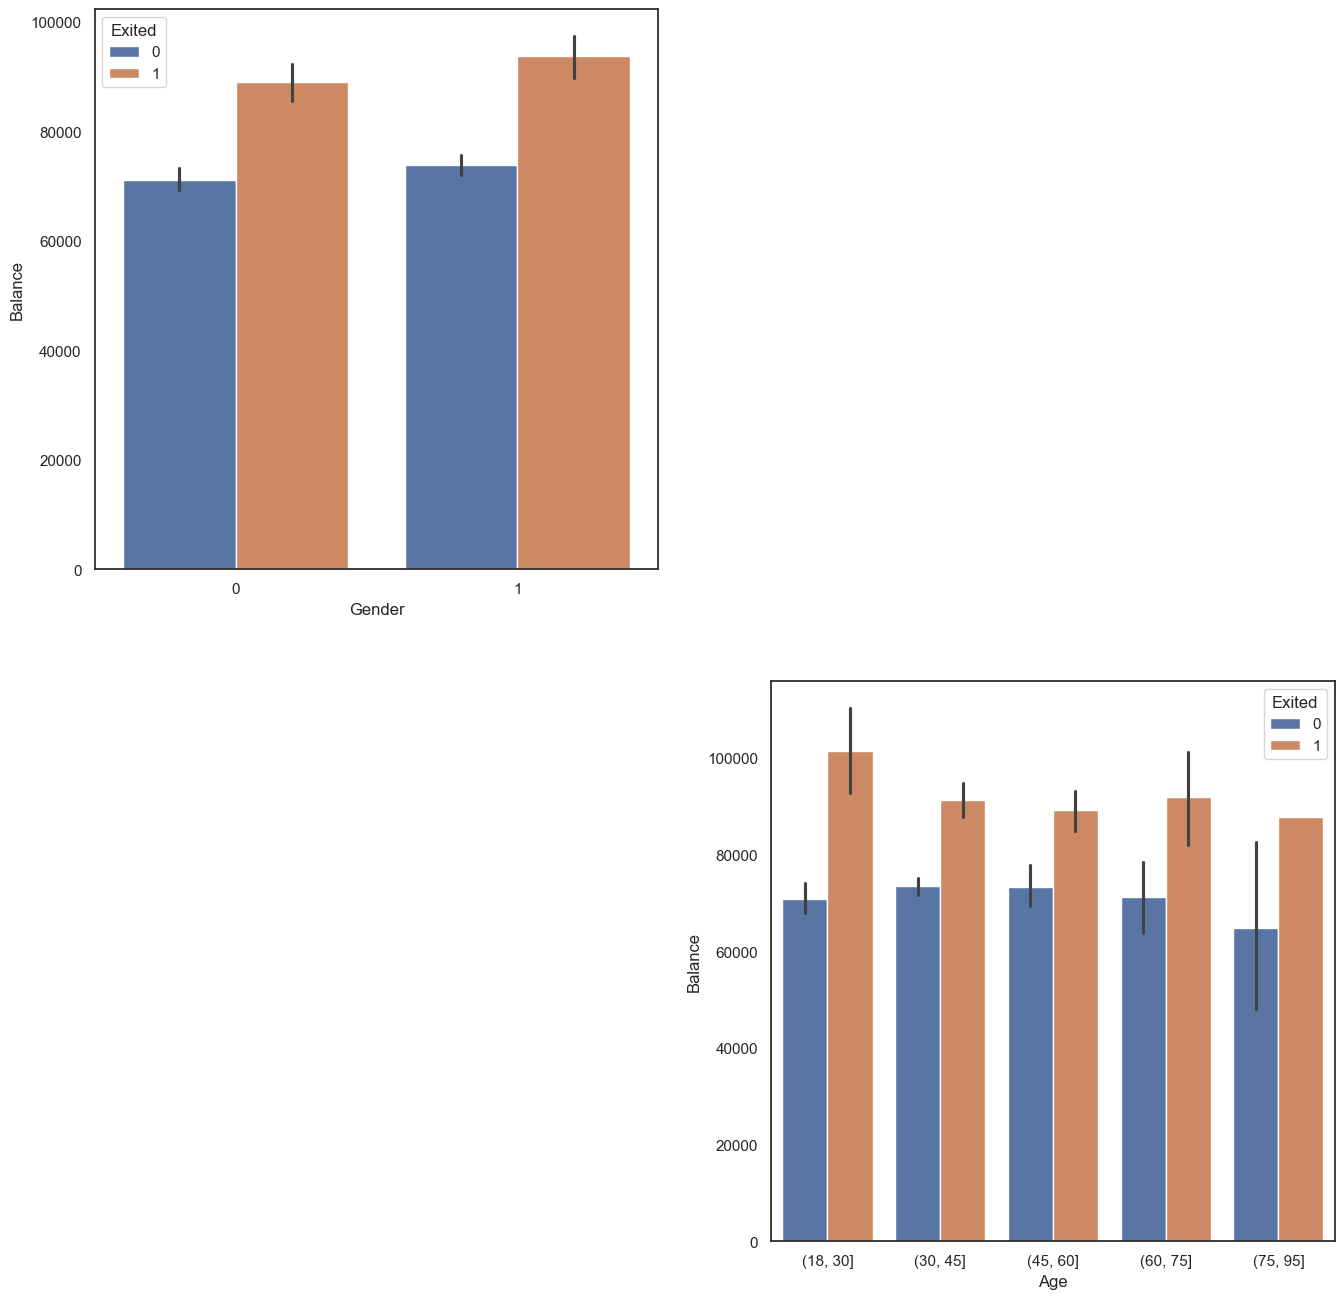

In [342]:
# we need to know the min and max value of Age attribute inorder to stratify it
print("Minimum Age : " + str(min(dataset['Age'])))
print("Maximum Age : " + str(max(dataset['Age'])))

# Creating a temporary DataFrame
tempDf = pd.DataFrame()     

# pd.cut() categorizes each Age value to fit in the specified cut range. Age is generalised to specific ranges for the purpose of plotting and analysing
tempDf['Age'] = pd.cut(dataset.Age, [18,30,45,60,75,95])   
tempDf['Exited'] = dataset['Exited']
tempDf['Gender'] = dataset['Gender']
tempDf['Balance'] = dataset['Balance']

plt.figure(figsize = (16,16))

# Plots the bar chart for Gender(x-axis) with Balance(y-axis) and categorises gender as people who Exited vs Not Exited
plt.subplot(2,2,1)
_= sn.barplot(x='Gender',y = 'Balance', hue = 'Exited', data = tempDf)

# Plots the bar chart for Age(x-axis) with Balance(y-axis) and categorises gender as people who Exited vs Not Exited
plt.subplot(2,2,4)
_= sn.barplot(x = 'Age', y = 'Balance', hue = 'Exited', data = tempDf)


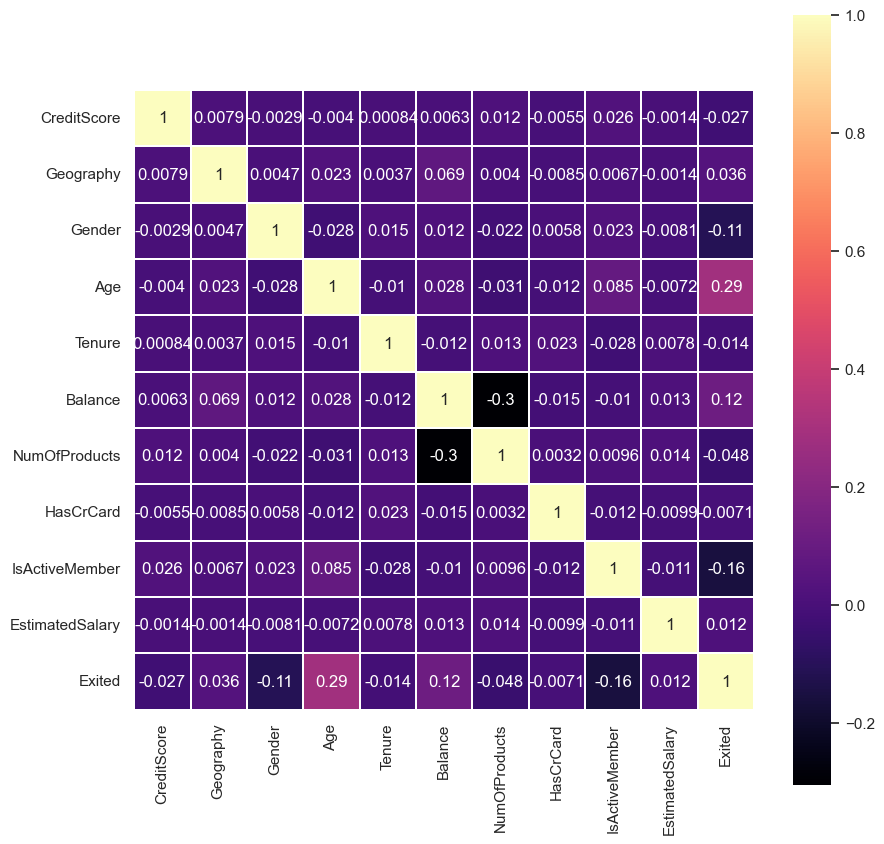

In [343]:
plt.figure(figsize=(10, 10))
sn.set(style = 'white')
sn.heatmap(dataset.select_dtypes(include='number').corr(), annot = True, cmap = 'magma', square = True, linewidths=0.1);

#**After analysing ,Testing the unknown sample**

**Using the ANN model to predict if the customer with the following informations will leave the bank:**

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: $60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: $50000

In [344]:
# import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import load_model

# # Load the trained model
# model = load_model('path_to_your_model.h5')
# label_encoder_geography.classes_ = np.load('label_encoder_geography_classes.npy')
# label_encoder_gender.classes_ = np.load('label_encoder_gender_classes.npy')

# Function to preprocess user input

def preprocess_input(credit_score, geography, gender,
                            age, tenure, balance, num_of_products, 
                            has_cr_card, is_active_member, estimated_salary):
    # Encode categorical variables
    geography_encoded = int(label_encoder_geography.transform([geography])[0])
    gender_encoded = int(label_encoder_gender.transform([gender])[0])
    
    # Create input array
    input_data = np.array([[credit_score, geography_encoded, gender_encoded,
                            age, tenure, balance, num_of_products, 
                            has_cr_card, is_active_member, estimated_salary]])
    
    # Apply scaling
    input_data=sc.transform(input_data)
    
    # return input_data
   
    
    return input_data
    

# Function to make predictions
def predict_churn(input_data):
    prediction = ann.predict(input_data)
    return prediction

# Get user input
geography = input("Enter Geography (e.g., France, Spain, Germany): ")
geography = geography.capitalize()  # Convert the first letter to uppercase
gender = input("Enter Gender (e.g., Male, Female): ")
gender = gender.capitalize()  # Convert the first letter to uppercase
credit_score = float(input("Enter Credit Score: "))
age = int(input("Enter Age: "))
tenure = int(input("Enter Tenure: "))
balance = float(input("Enter Balance: "))
num_of_products = int(input("Enter Number of Products: "))
has_cr_card = int(input("Enter 1 if has credit card, otherwise 0: "))
is_active_member = int(input("Enter 1 if active member, otherwise 0: "))
estimated_salary = float(input("Enter Estimated Salary: "))

# Preprocess user input
input_data = preprocess_input(credit_score, geography, gender,
                            age, tenure, balance, num_of_products, 
                            has_cr_card, is_active_member, estimated_salary)

# Make predictions
prediction = predict_churn(input_data)

# Display output
if prediction == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is not likely to churn.")


Enter Geography (e.g., France, Spain, Germany):  Germany
Enter Gender (e.g., Male, Female):  Female
Enter Credit Score:  1
Enter Age:  1
Enter Tenure:  1
Enter Balance:  1
Enter Number of Products:  1
Enter 1 if has credit card, otherwise 0:  1
Enter 1 if active member, otherwise 0:  1
Enter Estimated Salary:  1


1/1 [==============================] - 0s 22ms/step
The customer is not likely to churn.
